# Delay Line Implementation

# First Reflection in an augmented 2D scenario

In [9]:
import math
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal as sig

# Compute distance from microphone to line

# Straight Trajectory between starting and end point
P1 = np.array([3,20])
P2 = np.array([3, -5])
P3 = np.array([0,0])

# Assume source and receiver lie on the same plane above the ground
height = 1
fs = 8000
v = 5   # speed of sound source


# Compute distance from MIC (origin) to line
dline = np.abs((P2[0] - P1[0]) * (P1[1] - P3[1]) - (P1[0] - P3[0]) * (P2[1] - P1[1])) / np.sqrt(np.sum((P2-P1)**2))
dline2 = dline ** 2
# What happens when the line is exactly on the x or y axes?

# Compute distance from P0 to projection of MIC on the line
l2 = np.sum((P1-P2)**2)
t = np.sum((P3 - P1) * (P2 - P1)) / l2
P_proj = P1 + t * (P2 - P1)
dproj = np.sqrt(np.sum((P1 - P_proj) ** 2))

# Compute initial distance from MIC to P1
dinit = np.sqrt(dproj ** 2 + dline ** 2)

# Compute initial distance from first reflection to MIC
dinit_refl = np.sqrt(dinit ** 2 + (2 * height) ** 2)

# Compute time delay in number of samples
c = 343
tau_init = dinit / c
tau_init_refl = dinit_refl / c
M_init = tau_init * fs
M_init_refl = tau_init_refl * fs
print(M_init)
print(M_init_refl)

delays_sec = []
delays_sec_refl = []

delays_sec.append(tau_init)
delays_sec_refl.append(tau_init_refl)

471.6909251581734
473.99187015513877


In [10]:
# Define delay line
N = 48000
A = np.zeros(N)

rptr = 0
rptr2 = 0
wptr = 0
M1 = np.floor(M_init)    # Define initial delay
M2 = np.floor(M_init_refl)  # Initial delay for first reflection

def set_delay(M1, M2):
    global rptr
    global rptr2

    rptr = wptr - M1
    rptr2 = wptr - M2
    if (rptr < 0):
        rptr += N
    if (rptr2 < 0):
        rptr2 += N

def delay_line(x):
    
    global rptr
    global rptr2
    global wptr
    global A
    global v
    global dproj
    global c
    global fs
    global delays_sec
    global delays_sec_refl

    A[wptr] = x
    wptr += 1

    rpi = math.floor(rptr)
    a = rptr - rpi
    ydir = a * A[rpi + 1] + (1 - a) * A[rpi]
    
    rpi = math.floor(rptr2)
    a = rptr2 - rpi
    yrefl = a * A[rpi + 1] + (1 - a) * A[rpi]

    
    # Update delay
    dproj -= v / fs
    d = dline2 + dproj ** 2
    drefl = d + (2 * height) ** 2

    tau = np.sqrt(d) / c
    tau_refl = np.sqrt(drefl) / c
    M = tau * fs
    M2 = tau_refl * fs
    rptr = wptr - M
    rptr2 = wptr - M2

    # Compute attentuated output
    # y = 1 / (4 * np.pi * np.sqrt(d)) * ydir + 1 / (4 * np.pi * np.sqrt(drefl)) * yrefl
    y = ydir + yrefl
    # For the plots, remove later
    delays_sec.append(tau)
    
    
    if (rptr < 0):
        rptr += N
    if (rptr2 < 0):
        rptr2 += N
    if (wptr >= N - 1):
        wptr -= (N)
    if (rptr >= N - 1):
        rptr -= (N)
    if (rptr2 >= N - 1):
        rptr2 -= (N)
    return y

set_delay(M1, M2)
a = 0
signal = 0
## Test with signal
fs = 8000
f = 400
time = np.arange(0, 6, 1/fs)

# Sinusoidal
signal = np.sin(2 * np.pi * f * time)

# Noise
# signal = np.random.randn(len(time))

# Train impulse
# signal = np.zeros_like(time)
# signal[::100] = 1

a = np.zeros_like(signal)
for i in range(0, len(signal)):
    a[i] = delay_line(signal[i])
    # a[i] = delay_line(signal[i])



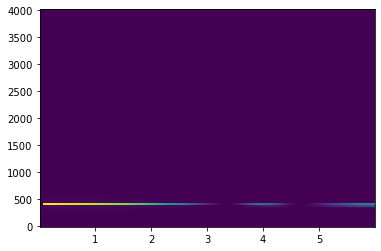

In [11]:
ff, tt, Sxx = sig.spectrogram(a, fs)
# plt.subplot(2,1,1)
plt.pcolormesh(tt, ff, Sxx, shading = 'auto')

# plt.subplot(2,1,2)
# plt.plot(range(0, 2048), a[1024:1024+2048])
plt.show()


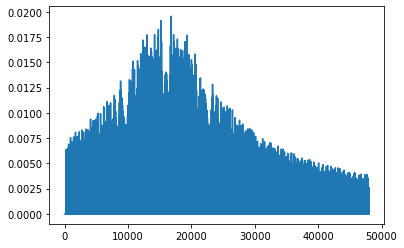

In [29]:
plt.plot(a)
plt.show()

# Delay Line with Absorption Filter

In [18]:
# Compute distance from microphone to line

# Straight Trajectory between starting and end point
P1 = np.array([3,10])
P2 = np.array([3, -5])
P3 = np.array([0,0])

# Assume source and receiver lie on the same plane above the ground
height = 1

v = 5   # speed of sound source


# Compute distance from MIC (origin) to line
dline = np.abs((P2[0] - P1[0]) * (P1[1] - P3[1]) - (P1[0] - P3[0]) * (P2[1] - P1[1])) / np.sqrt(np.sum((P2-P1)**2))
dline2 = dline ** 2
# What happens when the line is exactly on the x or y axes?

# Compute distance from P0 to projection of MIC on the line
l2 = np.sum((P1-P2)**2)
t = np.sum((P3 - P1) * (P2 - P1)) / l2
P_proj = P1 + t * (P2 - P1)
dproj_init = np.sqrt(np.sum((P1 - P_proj) ** 2))

# Compute initial distance from MIC to P1
dinit = np.sqrt(dproj_init ** 2 + dline ** 2)

# Compute initial distance from first reflection to MIC
dinit_refl = np.sqrt(dinit ** 2 + (2 * height) ** 2)

# Compute time delay in number of samples
c = 343
tau_init = dinit / c
tau_init_refl = dinit_refl / c
M_init = tau_init * fs
M_init_refl = tau_init_refl * fs
print(M_init)
print(M_init_refl)

delays_sec = []
delays_sec_refl = []

delays_sec.append(tau_init)
delays_sec_refl.append(tau_init_refl)

243.50569116992537
247.9334300346274


In [19]:
def set_delay(M1, M2):
    global rptr
    global rptr2

    rptr = wptr - M1
    rptr2 = wptr - M2
    if (rptr < 0):
        rptr += N
    if (rptr2 < 0):
        rptr2 += N

def delay_line(x):
    
    global rptr
    global rptr2
    global wptr
    global A
    global v
    global dproj
    global c
    global fs
    global delays_sec
    global delays_sec_refl
    
    A[wptr] = x
    wptr += 1

    rpi = math.floor(rptr)
    a = rptr - rpi
    ydir = a * A[rpi + 1] + (1 - a) * A[rpi]
    
    rpi = math.floor(rptr2)
    a = rptr2 - rpi
    yrefl = a * A[rpi + 1] + (1 - a) * A[rpi]

    # Apply absorption filter
    # alpha = 1 - 0.8
    # yrefl = alpha * yrefl
    
    # Update delay
    dproj -= v / fs
    d = dline2 + dproj ** 2
    drefl = d + (2 * height) ** 2

    tau = np.sqrt(d) / c
    tau_refl = np.sqrt(drefl) / c
    M1 = tau * fs
    M2 = tau_refl * fs
    rptr = wptr - M1
    rptr2 = wptr - M2

    # Compute attentuated output
    y = 1 / (4 * np.pi * np.sqrt(d)) * ydir + 1 / (4 * np.pi * np.sqrt(drefl)) * yrefl
    # For the plots, remove later
    delays_sec.append(tau)
    
    
    if (rptr < 0):
        rptr += N
    if (rptr2 < 0):
        rptr2 += N
    if (wptr >= N - 1):
        wptr -= (N)
    if (rptr >= N - 1):
        rptr -= (N)
    if (rptr2 >= N - 1):
        rptr2 -= (N)
    return ydir, yrefl, d, drefl

# Define delay line
N = 48000
A = np.zeros(N)

rptr = 0
rptr2 = 0
wptr = 0
M1 = np.floor(M_init)    # Define initial delay
M2 = np.floor(M_init_refl)  # Initial delay for first reflection
dproj = dproj_init

set_delay(M1, M2)
a = 0
signal = 0
## Test with signal
fs = 8000
f = 400
time = np.arange(0, 6, 1/fs)

# Sinusoidal
signal = np.sin(2 * np.pi * f * time)

# Noise
# signal = np.random.randn(len(time))

# Train impulse
signal = np.zeros_like(time)
signal[::100] = 1

adir = np.zeros_like(signal)
arefl = np.zeros_like(signal)

# Compute attenuation depending on distance
for i in range(0, len(signal)):
    [ydir, yrefl, ddir, drefl] = delay_line(signal[i])
    adir[i] = ydir#1/(4*np.pi*ddir) * ydir
    arefl[i] = yrefl#1/(4*np.pi*drefl) * yrefl

# Filter using Absorption Filter
from scipy.io import loadmat
absorption_filter = loadmat('h_fir.mat')
absorption_filter = absorption_filter['h_fir']
absorption_filter = [row[0] for row in absorption_filter]
# absorption_filter = np.zeros(9)
# absorption_filter[0] = 1
# print(absorption_filter)
reflected_component = adir

# Compute Signal
# Zero - pad
direct_component = arefl

# Sum
aa = direct_component + reflected_component

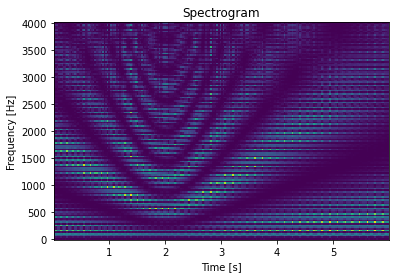

In [20]:
ff, tt, Sxx = sig.spectrogram(aa, fs)
plt.pcolormesh(tt, ff, Sxx, shading = 'auto')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()

wavfile.write('prova.wav', fs, 0.5*aa)